In [1]:
%run basicOp.py
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def peakDetect_h(df_h, freq):
    height = df_h['power'].quantile(0.98) + 5
    peaks, properties  = find_peaks(df_h['power'].tolist(), height=height)
    df = df_h.iloc[peaks, :]

    # find the center peak (carrier signal)
    center_f_idx = properties['peak_heights'].argmax(axis=0)
    center_f = df_h.iloc[peaks[center_f_idx], 0]
    center_f_power = df_h.iloc[peaks[center_f_idx], 1]
    
    # locate the right peak
    tmp = df[((df.frequency - center_f) < (freq*1e6 + 1e6)) & ((df.frequency - center_f) > (freq*1e6 - 1e6))]
    if len(tmp) == 0:
        right_peak_f, right_peak_power = NaN, NaN
    else:
        right_peak = tmp[tmp.power == max(tmp.power)]
        right_peak_f, right_peak_power = right_peak.iloc[0,0], right_peak.iloc[0,1]    

    # locate the left peak
    tmp = df[((center_f - df.frequency) < (freq*1e6 + 1e6)) & ((center_f - df.frequency) > (freq*1e6 - 1e6))]
    if len(tmp) == 0:
        left_peak_f, left_peak_power = NaN, NaN
    else:
        left_peak = tmp[tmp.power == max(tmp.power)]
        left_peak_f, left_peak_power = left_peak.iloc[0,0], left_peak.iloc[0,1]   
    return [center_f, center_f_power, right_peak_f, right_peak_power, left_peak_f, left_peak_power]

def readFreq_h(frequencies, gain, samples=20):  
    FreqSeries = pd.DataFrame(index = range(len(frequencies)), columns=['center_f', 'center_p', 'right_f', 'right_p', 'left_f', 'left_p'])
    for idx, freq in enumerate(frequencies):
        print(f"The mixed signal frequency is {freq}.")
        FreqSeries_tmp = pd.DataFrame(index = range(samples), columns=['center_f', 'center_p', 'right_f', 'right_p', 'left_f', 'left_p'])
        path = './logs/h_f' +  str(freq) + '_g' + str(gain) + '/'
        for i in range(samples):
            filename = 'data' + str(i)
            print(path + filename + ".csv")
            df = readfile(path + filename + ".csv")
            FreqSeries_tmp.iloc[i,:] = peakDetect_h(df, freq)
#         print(FreqSeries_tmp)
        FreqSeries_tmp = FreqSeries_tmp.dropna()
        FreqSeries.iloc[idx,:] = FreqSeries_tmp.mean()
#     print(FreqSeries)
    return FreqSeries

def peakDetect_l(df_l, freq):
    height = df_l['power'].quantile(0.99)
    peaks, properties  = find_peaks(df_l['power'].tolist(), height=height)
    df = df_l.iloc[peaks, :]
    
    # # locate the right peak
    delta = 2.5 if freq > 10 else 1
    tmp = df[(df.frequency < (freq*1e6 + delta*1e6)) & (df.frequency > (freq*1e6 - delta*1e6))]
    if len(tmp) == 0:
        return [NaN, NaN]
    else:
        right_peak = tmp[tmp.power == max(tmp.power)]
        return [right_peak.iloc[0,0], right_peak.iloc[0,1]]
    
def readFreq_l(frequencies, gain, samples=20):  
    FreqSeries = pd.DataFrame(index = range(len(frequencies)), columns=['right_f', 'right_p'])
    for idx, freq in enumerate(frequencies):
        print(f"The mixed signal frequency is {freq}.")
        FreqSeries_tmp = pd.DataFrame(index = range(samples), columns=['right_f', 'right_p'])
        path = './logs/l_f' +  str(freq) + '_g' + str(gain) + '/'
        for i in range(samples):
            filename = 'data' + str(i)
            print(path + filename + ".csv")
            df = readfile(path + filename + ".csv")
            FreqSeries_tmp.iloc[i,:] = peakDetect_l(df, freq)
#         print(FreqSeries_tmp)
        FreqSeries_tmp = FreqSeries_tmp.dropna()
#         print(FreqSeries_tmp)
        FreqSeries.iloc[idx,:] = FreqSeries_tmp.mean()
    print(FreqSeries)
    return FreqSeries

In [3]:
frequencies = list(range(0,11)) + list(range(15,105,5))
results_h = []
results_l = []
for g in [0,5,10,15,20]:
    results_h.append(readFreq_h(frequencies, g, 20))
    results_l.append(readFreq_l(frequencies, g, 20))

The mixed signal frequency is 0.
./logs/h_f0_g0/data0.csv
./logs/h_f0_g0/data1.csv
./logs/h_f0_g0/data2.csv
./logs/h_f0_g0/data3.csv
./logs/h_f0_g0/data4.csv
./logs/h_f0_g0/data5.csv
./logs/h_f0_g0/data6.csv
./logs/h_f0_g0/data7.csv
./logs/h_f0_g0/data8.csv
./logs/h_f0_g0/data9.csv
./logs/h_f0_g0/data10.csv
./logs/h_f0_g0/data11.csv
./logs/h_f0_g0/data12.csv
./logs/h_f0_g0/data13.csv
./logs/h_f0_g0/data14.csv
./logs/h_f0_g0/data15.csv
./logs/h_f0_g0/data16.csv
./logs/h_f0_g0/data17.csv
./logs/h_f0_g0/data18.csv
./logs/h_f0_g0/data19.csv
The mixed signal frequency is 1.
./logs/h_f1_g0/data0.csv
./logs/h_f1_g0/data1.csv
./logs/h_f1_g0/data2.csv
./logs/h_f1_g0/data3.csv
./logs/h_f1_g0/data4.csv
./logs/h_f1_g0/data5.csv
./logs/h_f1_g0/data6.csv
./logs/h_f1_g0/data7.csv
./logs/h_f1_g0/data8.csv
./logs/h_f1_g0/data9.csv
./logs/h_f1_g0/data10.csv
./logs/h_f1_g0/data11.csv
./logs/h_f1_g0/data12.csv
./logs/h_f1_g0/data13.csv
./logs/h_f1_g0/data14.csv
./logs/h_f1_g0/data15.csv
./logs/h_f1_g0/dat

./logs/h_f30_g0/data19.csv
The mixed signal frequency is 35.
./logs/h_f35_g0/data0.csv
./logs/h_f35_g0/data1.csv
./logs/h_f35_g0/data2.csv
./logs/h_f35_g0/data3.csv
./logs/h_f35_g0/data4.csv
./logs/h_f35_g0/data5.csv
./logs/h_f35_g0/data6.csv
./logs/h_f35_g0/data7.csv
./logs/h_f35_g0/data8.csv
./logs/h_f35_g0/data9.csv
./logs/h_f35_g0/data10.csv
./logs/h_f35_g0/data11.csv
./logs/h_f35_g0/data12.csv
./logs/h_f35_g0/data13.csv
./logs/h_f35_g0/data14.csv
./logs/h_f35_g0/data15.csv
./logs/h_f35_g0/data16.csv
./logs/h_f35_g0/data17.csv
./logs/h_f35_g0/data18.csv
./logs/h_f35_g0/data19.csv
The mixed signal frequency is 40.
./logs/h_f40_g0/data0.csv
./logs/h_f40_g0/data1.csv
./logs/h_f40_g0/data2.csv
./logs/h_f40_g0/data3.csv
./logs/h_f40_g0/data4.csv
./logs/h_f40_g0/data5.csv
./logs/h_f40_g0/data6.csv
./logs/h_f40_g0/data7.csv
./logs/h_f40_g0/data8.csv
./logs/h_f40_g0/data9.csv
./logs/h_f40_g0/data10.csv
./logs/h_f40_g0/data11.csv
./logs/h_f40_g0/data12.csv
./logs/h_f40_g0/data13.csv
./logs/

./logs/l_f0_g0/data11.csv
./logs/l_f0_g0/data12.csv
./logs/l_f0_g0/data13.csv
./logs/l_f0_g0/data14.csv
./logs/l_f0_g0/data15.csv
./logs/l_f0_g0/data16.csv
./logs/l_f0_g0/data17.csv
./logs/l_f0_g0/data18.csv
./logs/l_f0_g0/data19.csv
The mixed signal frequency is 1.
./logs/l_f1_g0/data0.csv
./logs/l_f1_g0/data1.csv
./logs/l_f1_g0/data2.csv
./logs/l_f1_g0/data3.csv
./logs/l_f1_g0/data4.csv
./logs/l_f1_g0/data5.csv
./logs/l_f1_g0/data6.csv
./logs/l_f1_g0/data7.csv
./logs/l_f1_g0/data8.csv
./logs/l_f1_g0/data9.csv
./logs/l_f1_g0/data10.csv
./logs/l_f1_g0/data11.csv
./logs/l_f1_g0/data12.csv
./logs/l_f1_g0/data13.csv
./logs/l_f1_g0/data14.csv
./logs/l_f1_g0/data15.csv
./logs/l_f1_g0/data16.csv
./logs/l_f1_g0/data17.csv
./logs/l_f1_g0/data18.csv
./logs/l_f1_g0/data19.csv
The mixed signal frequency is 2.
./logs/l_f2_g0/data0.csv
./logs/l_f2_g0/data1.csv
./logs/l_f2_g0/data2.csv
./logs/l_f2_g0/data3.csv
./logs/l_f2_g0/data4.csv
./logs/l_f2_g0/data5.csv
./logs/l_f2_g0/data6.csv
./logs/l_f2_g0/

./logs/l_f35_g0/data12.csv
./logs/l_f35_g0/data13.csv
./logs/l_f35_g0/data14.csv
./logs/l_f35_g0/data15.csv
./logs/l_f35_g0/data16.csv
./logs/l_f35_g0/data17.csv
./logs/l_f35_g0/data18.csv
./logs/l_f35_g0/data19.csv
The mixed signal frequency is 40.
./logs/l_f40_g0/data0.csv
./logs/l_f40_g0/data1.csv
./logs/l_f40_g0/data2.csv
./logs/l_f40_g0/data3.csv
./logs/l_f40_g0/data4.csv
./logs/l_f40_g0/data5.csv
./logs/l_f40_g0/data6.csv
./logs/l_f40_g0/data7.csv
./logs/l_f40_g0/data8.csv
./logs/l_f40_g0/data9.csv
./logs/l_f40_g0/data10.csv
./logs/l_f40_g0/data11.csv
./logs/l_f40_g0/data12.csv
./logs/l_f40_g0/data13.csv
./logs/l_f40_g0/data14.csv
./logs/l_f40_g0/data15.csv
./logs/l_f40_g0/data16.csv
./logs/l_f40_g0/data17.csv
./logs/l_f40_g0/data18.csv
./logs/l_f40_g0/data19.csv
The mixed signal frequency is 45.
./logs/l_f45_g0/data0.csv
./logs/l_f45_g0/data1.csv
./logs/l_f45_g0/data2.csv
./logs/l_f45_g0/data3.csv
./logs/l_f45_g0/data4.csv
./logs/l_f45_g0/data5.csv
./logs/l_f45_g0/data6.csv
./lo

./logs/h_f0_g5/data1.csv
./logs/h_f0_g5/data2.csv
./logs/h_f0_g5/data3.csv
./logs/h_f0_g5/data4.csv
./logs/h_f0_g5/data5.csv
./logs/h_f0_g5/data6.csv
./logs/h_f0_g5/data7.csv
./logs/h_f0_g5/data8.csv
./logs/h_f0_g5/data9.csv
./logs/h_f0_g5/data10.csv
./logs/h_f0_g5/data11.csv
./logs/h_f0_g5/data12.csv
./logs/h_f0_g5/data13.csv
./logs/h_f0_g5/data14.csv
./logs/h_f0_g5/data15.csv
./logs/h_f0_g5/data16.csv
./logs/h_f0_g5/data17.csv
./logs/h_f0_g5/data18.csv
./logs/h_f0_g5/data19.csv
The mixed signal frequency is 1.
./logs/h_f1_g5/data0.csv
./logs/h_f1_g5/data1.csv
./logs/h_f1_g5/data2.csv
./logs/h_f1_g5/data3.csv
./logs/h_f1_g5/data4.csv
./logs/h_f1_g5/data5.csv
./logs/h_f1_g5/data6.csv
./logs/h_f1_g5/data7.csv
./logs/h_f1_g5/data8.csv
./logs/h_f1_g5/data9.csv
./logs/h_f1_g5/data10.csv
./logs/h_f1_g5/data11.csv
./logs/h_f1_g5/data12.csv
./logs/h_f1_g5/data13.csv
./logs/h_f1_g5/data14.csv
./logs/h_f1_g5/data15.csv
./logs/h_f1_g5/data16.csv
./logs/h_f1_g5/data17.csv
./logs/h_f1_g5/data18.cs

The mixed signal frequency is 35.
./logs/h_f35_g5/data0.csv
./logs/h_f35_g5/data1.csv
./logs/h_f35_g5/data2.csv
./logs/h_f35_g5/data3.csv
./logs/h_f35_g5/data4.csv
./logs/h_f35_g5/data5.csv
./logs/h_f35_g5/data6.csv
./logs/h_f35_g5/data7.csv
./logs/h_f35_g5/data8.csv
./logs/h_f35_g5/data9.csv
./logs/h_f35_g5/data10.csv
./logs/h_f35_g5/data11.csv
./logs/h_f35_g5/data12.csv
./logs/h_f35_g5/data13.csv
./logs/h_f35_g5/data14.csv
./logs/h_f35_g5/data15.csv
./logs/h_f35_g5/data16.csv
./logs/h_f35_g5/data17.csv
./logs/h_f35_g5/data18.csv
./logs/h_f35_g5/data19.csv
The mixed signal frequency is 40.
./logs/h_f40_g5/data0.csv
./logs/h_f40_g5/data1.csv
./logs/h_f40_g5/data2.csv
./logs/h_f40_g5/data3.csv
./logs/h_f40_g5/data4.csv
./logs/h_f40_g5/data5.csv
./logs/h_f40_g5/data6.csv
./logs/h_f40_g5/data7.csv
./logs/h_f40_g5/data8.csv
./logs/h_f40_g5/data9.csv
./logs/h_f40_g5/data10.csv
./logs/h_f40_g5/data11.csv
./logs/h_f40_g5/data12.csv
./logs/h_f40_g5/data13.csv
./logs/h_f40_g5/data14.csv
./logs/

./logs/l_f0_g5/data15.csv
./logs/l_f0_g5/data16.csv
./logs/l_f0_g5/data17.csv
./logs/l_f0_g5/data18.csv
./logs/l_f0_g5/data19.csv
The mixed signal frequency is 1.
./logs/l_f1_g5/data0.csv
./logs/l_f1_g5/data1.csv
./logs/l_f1_g5/data2.csv
./logs/l_f1_g5/data3.csv
./logs/l_f1_g5/data4.csv
./logs/l_f1_g5/data5.csv
./logs/l_f1_g5/data6.csv
./logs/l_f1_g5/data7.csv
./logs/l_f1_g5/data8.csv
./logs/l_f1_g5/data9.csv
./logs/l_f1_g5/data10.csv
./logs/l_f1_g5/data11.csv
./logs/l_f1_g5/data12.csv
./logs/l_f1_g5/data13.csv
./logs/l_f1_g5/data14.csv
./logs/l_f1_g5/data15.csv
./logs/l_f1_g5/data16.csv
./logs/l_f1_g5/data17.csv
./logs/l_f1_g5/data18.csv
./logs/l_f1_g5/data19.csv
The mixed signal frequency is 2.
./logs/l_f2_g5/data0.csv
./logs/l_f2_g5/data1.csv
./logs/l_f2_g5/data2.csv
./logs/l_f2_g5/data3.csv
./logs/l_f2_g5/data4.csv
./logs/l_f2_g5/data5.csv
./logs/l_f2_g5/data6.csv
./logs/l_f2_g5/data7.csv
./logs/l_f2_g5/data8.csv
./logs/l_f2_g5/data9.csv
./logs/l_f2_g5/data10.csv
./logs/l_f2_g5/dat

./logs/l_f35_g5/data13.csv
./logs/l_f35_g5/data14.csv
./logs/l_f35_g5/data15.csv
./logs/l_f35_g5/data16.csv
./logs/l_f35_g5/data17.csv
./logs/l_f35_g5/data18.csv
./logs/l_f35_g5/data19.csv
The mixed signal frequency is 40.
./logs/l_f40_g5/data0.csv
./logs/l_f40_g5/data1.csv
./logs/l_f40_g5/data2.csv
./logs/l_f40_g5/data3.csv
./logs/l_f40_g5/data4.csv
./logs/l_f40_g5/data5.csv
./logs/l_f40_g5/data6.csv
./logs/l_f40_g5/data7.csv
./logs/l_f40_g5/data8.csv
./logs/l_f40_g5/data9.csv
./logs/l_f40_g5/data10.csv
./logs/l_f40_g5/data11.csv
./logs/l_f40_g5/data12.csv
./logs/l_f40_g5/data13.csv
./logs/l_f40_g5/data14.csv
./logs/l_f40_g5/data15.csv
./logs/l_f40_g5/data16.csv
./logs/l_f40_g5/data17.csv
./logs/l_f40_g5/data18.csv
./logs/l_f40_g5/data19.csv
The mixed signal frequency is 45.
./logs/l_f45_g5/data0.csv
./logs/l_f45_g5/data1.csv
./logs/l_f45_g5/data2.csv
./logs/l_f45_g5/data3.csv
./logs/l_f45_g5/data4.csv
./logs/l_f45_g5/data5.csv
./logs/l_f45_g5/data6.csv
./logs/l_f45_g5/data7.csv
./log

./logs/h_f0_g10/data2.csv
./logs/h_f0_g10/data3.csv
./logs/h_f0_g10/data4.csv
./logs/h_f0_g10/data5.csv
./logs/h_f0_g10/data6.csv
./logs/h_f0_g10/data7.csv
./logs/h_f0_g10/data8.csv
./logs/h_f0_g10/data9.csv
./logs/h_f0_g10/data10.csv
./logs/h_f0_g10/data11.csv
./logs/h_f0_g10/data12.csv
./logs/h_f0_g10/data13.csv
./logs/h_f0_g10/data14.csv
./logs/h_f0_g10/data15.csv
./logs/h_f0_g10/data16.csv
./logs/h_f0_g10/data17.csv
./logs/h_f0_g10/data18.csv
./logs/h_f0_g10/data19.csv
The mixed signal frequency is 1.
./logs/h_f1_g10/data0.csv
./logs/h_f1_g10/data1.csv
./logs/h_f1_g10/data2.csv
./logs/h_f1_g10/data3.csv
./logs/h_f1_g10/data4.csv
./logs/h_f1_g10/data5.csv
./logs/h_f1_g10/data6.csv
./logs/h_f1_g10/data7.csv
./logs/h_f1_g10/data8.csv
./logs/h_f1_g10/data9.csv
./logs/h_f1_g10/data10.csv
./logs/h_f1_g10/data11.csv
./logs/h_f1_g10/data12.csv
./logs/h_f1_g10/data13.csv
./logs/h_f1_g10/data14.csv
./logs/h_f1_g10/data15.csv
./logs/h_f1_g10/data16.csv
./logs/h_f1_g10/data17.csv
./logs/h_f1_g

./logs/h_f30_g10/data11.csv
./logs/h_f30_g10/data12.csv
./logs/h_f30_g10/data13.csv
./logs/h_f30_g10/data14.csv
./logs/h_f30_g10/data15.csv
./logs/h_f30_g10/data16.csv
./logs/h_f30_g10/data17.csv
./logs/h_f30_g10/data18.csv
./logs/h_f30_g10/data19.csv
The mixed signal frequency is 35.
./logs/h_f35_g10/data0.csv
./logs/h_f35_g10/data1.csv
./logs/h_f35_g10/data2.csv
./logs/h_f35_g10/data3.csv
./logs/h_f35_g10/data4.csv
./logs/h_f35_g10/data5.csv
./logs/h_f35_g10/data6.csv
./logs/h_f35_g10/data7.csv
./logs/h_f35_g10/data8.csv
./logs/h_f35_g10/data9.csv
./logs/h_f35_g10/data10.csv
./logs/h_f35_g10/data11.csv
./logs/h_f35_g10/data12.csv
./logs/h_f35_g10/data13.csv
./logs/h_f35_g10/data14.csv
./logs/h_f35_g10/data15.csv
./logs/h_f35_g10/data16.csv
./logs/h_f35_g10/data17.csv
./logs/h_f35_g10/data18.csv
./logs/h_f35_g10/data19.csv
The mixed signal frequency is 40.
./logs/h_f40_g10/data0.csv
./logs/h_f40_g10/data1.csv
./logs/h_f40_g10/data2.csv
./logs/h_f40_g10/data3.csv
./logs/h_f40_g10/data4

./logs/h_f100_g10/data14.csv
./logs/h_f100_g10/data15.csv
./logs/h_f100_g10/data16.csv
./logs/h_f100_g10/data17.csv
./logs/h_f100_g10/data18.csv
./logs/h_f100_g10/data19.csv
The mixed signal frequency is 0.
./logs/l_f0_g10/data0.csv
./logs/l_f0_g10/data1.csv
./logs/l_f0_g10/data2.csv
./logs/l_f0_g10/data3.csv
./logs/l_f0_g10/data4.csv
./logs/l_f0_g10/data5.csv
./logs/l_f0_g10/data6.csv
./logs/l_f0_g10/data7.csv
./logs/l_f0_g10/data8.csv
./logs/l_f0_g10/data9.csv
./logs/l_f0_g10/data10.csv
./logs/l_f0_g10/data11.csv
./logs/l_f0_g10/data12.csv
./logs/l_f0_g10/data13.csv
./logs/l_f0_g10/data14.csv
./logs/l_f0_g10/data15.csv
./logs/l_f0_g10/data16.csv
./logs/l_f0_g10/data17.csv
./logs/l_f0_g10/data18.csv
./logs/l_f0_g10/data19.csv
The mixed signal frequency is 1.
./logs/l_f1_g10/data0.csv
./logs/l_f1_g10/data1.csv
./logs/l_f1_g10/data2.csv
./logs/l_f1_g10/data3.csv
./logs/l_f1_g10/data4.csv
./logs/l_f1_g10/data5.csv
./logs/l_f1_g10/data6.csv
./logs/l_f1_g10/data7.csv
./logs/l_f1_g10/data8.

./logs/l_f30_g10/data4.csv
./logs/l_f30_g10/data5.csv
./logs/l_f30_g10/data6.csv
./logs/l_f30_g10/data7.csv
./logs/l_f30_g10/data8.csv
./logs/l_f30_g10/data9.csv
./logs/l_f30_g10/data10.csv
./logs/l_f30_g10/data11.csv
./logs/l_f30_g10/data12.csv
./logs/l_f30_g10/data13.csv
./logs/l_f30_g10/data14.csv
./logs/l_f30_g10/data15.csv
./logs/l_f30_g10/data16.csv
./logs/l_f30_g10/data17.csv
./logs/l_f30_g10/data18.csv
./logs/l_f30_g10/data19.csv
The mixed signal frequency is 35.
./logs/l_f35_g10/data0.csv
./logs/l_f35_g10/data1.csv
./logs/l_f35_g10/data2.csv
./logs/l_f35_g10/data3.csv
./logs/l_f35_g10/data4.csv
./logs/l_f35_g10/data5.csv
./logs/l_f35_g10/data6.csv
./logs/l_f35_g10/data7.csv
./logs/l_f35_g10/data8.csv
./logs/l_f35_g10/data9.csv
./logs/l_f35_g10/data10.csv
./logs/l_f35_g10/data11.csv
./logs/l_f35_g10/data12.csv
./logs/l_f35_g10/data13.csv
./logs/l_f35_g10/data14.csv
./logs/l_f35_g10/data15.csv
./logs/l_f35_g10/data16.csv
./logs/l_f35_g10/data17.csv
./logs/l_f35_g10/data18.csv
./

./logs/l_f100_g10/data6.csv
./logs/l_f100_g10/data7.csv
./logs/l_f100_g10/data8.csv
./logs/l_f100_g10/data9.csv
./logs/l_f100_g10/data10.csv
./logs/l_f100_g10/data11.csv
./logs/l_f100_g10/data12.csv
./logs/l_f100_g10/data13.csv
./logs/l_f100_g10/data14.csv
./logs/l_f100_g10/data15.csv
./logs/l_f100_g10/data16.csv
./logs/l_f100_g10/data17.csv
./logs/l_f100_g10/data18.csv
./logs/l_f100_g10/data19.csv
        right_f  right_p
0       72631.8 -88.1753
1       69213.8 -88.3698
2   1.18384e+06 -87.2449
3   2.46167e+06 -84.5196
4   3.51465e+06 -83.8222
5   4.63708e+06 -84.0862
6   5.66247e+06 -83.6963
7   6.67908e+06 -83.7375
8   7.70776e+06 -84.1594
9   8.71423e+06 -84.1762
10  9.74707e+06 -84.1187
11  1.47804e+07 -85.0397
12  1.98196e+07 -84.0948
13  2.46029e+07 -84.0692
14  3.20001e+07 -69.9413
15  3.48718e+07 -84.1471
16  3.97233e+07 -84.0579
17  4.44237e+07 -84.2514
18  4.99554e+07  -83.708
19   5.4967e+07 -84.2341
20  6.00539e+07  -82.762
21  6.46603e+07 -84.5805
22  6.98446e+07 -83.011

./logs/h_f20_g15/data9.csv
./logs/h_f20_g15/data10.csv
./logs/h_f20_g15/data11.csv
./logs/h_f20_g15/data12.csv
./logs/h_f20_g15/data13.csv
./logs/h_f20_g15/data14.csv
./logs/h_f20_g15/data15.csv
./logs/h_f20_g15/data16.csv
./logs/h_f20_g15/data17.csv
./logs/h_f20_g15/data18.csv
./logs/h_f20_g15/data19.csv
The mixed signal frequency is 25.
./logs/h_f25_g15/data0.csv
./logs/h_f25_g15/data1.csv
./logs/h_f25_g15/data2.csv
./logs/h_f25_g15/data3.csv
./logs/h_f25_g15/data4.csv
./logs/h_f25_g15/data5.csv
./logs/h_f25_g15/data6.csv
./logs/h_f25_g15/data7.csv
./logs/h_f25_g15/data8.csv
./logs/h_f25_g15/data9.csv
./logs/h_f25_g15/data10.csv
./logs/h_f25_g15/data11.csv
./logs/h_f25_g15/data12.csv
./logs/h_f25_g15/data13.csv
./logs/h_f25_g15/data14.csv
./logs/h_f25_g15/data15.csv
./logs/h_f25_g15/data16.csv
./logs/h_f25_g15/data17.csv
./logs/h_f25_g15/data18.csv
./logs/h_f25_g15/data19.csv
The mixed signal frequency is 30.
./logs/h_f30_g15/data0.csv
./logs/h_f30_g15/data1.csv
./logs/h_f30_g15/data

./logs/h_f90_g15/data12.csv
./logs/h_f90_g15/data13.csv
./logs/h_f90_g15/data14.csv
./logs/h_f90_g15/data15.csv
./logs/h_f90_g15/data16.csv
./logs/h_f90_g15/data17.csv
./logs/h_f90_g15/data18.csv
./logs/h_f90_g15/data19.csv
The mixed signal frequency is 95.
./logs/h_f95_g15/data0.csv
./logs/h_f95_g15/data1.csv
./logs/h_f95_g15/data2.csv
./logs/h_f95_g15/data3.csv
./logs/h_f95_g15/data4.csv
./logs/h_f95_g15/data5.csv
./logs/h_f95_g15/data6.csv
./logs/h_f95_g15/data7.csv
./logs/h_f95_g15/data8.csv
./logs/h_f95_g15/data9.csv
./logs/h_f95_g15/data10.csv
./logs/h_f95_g15/data11.csv
./logs/h_f95_g15/data12.csv
./logs/h_f95_g15/data13.csv
./logs/h_f95_g15/data14.csv
./logs/h_f95_g15/data15.csv
./logs/h_f95_g15/data16.csv
./logs/h_f95_g15/data17.csv
./logs/h_f95_g15/data18.csv
./logs/h_f95_g15/data19.csv
The mixed signal frequency is 100.
./logs/h_f100_g15/data0.csv
./logs/h_f100_g15/data1.csv
./logs/h_f100_g15/data2.csv
./logs/h_f100_g15/data3.csv
./logs/h_f100_g15/data4.csv
./logs/h_f100_g15

./logs/l_f20_g15/data2.csv
./logs/l_f20_g15/data3.csv
./logs/l_f20_g15/data4.csv
./logs/l_f20_g15/data5.csv
./logs/l_f20_g15/data6.csv
./logs/l_f20_g15/data7.csv
./logs/l_f20_g15/data8.csv
./logs/l_f20_g15/data9.csv
./logs/l_f20_g15/data10.csv
./logs/l_f20_g15/data11.csv
./logs/l_f20_g15/data12.csv
./logs/l_f20_g15/data13.csv
./logs/l_f20_g15/data14.csv
./logs/l_f20_g15/data15.csv
./logs/l_f20_g15/data16.csv
./logs/l_f20_g15/data17.csv
./logs/l_f20_g15/data18.csv
./logs/l_f20_g15/data19.csv
The mixed signal frequency is 25.
./logs/l_f25_g15/data0.csv
./logs/l_f25_g15/data1.csv
./logs/l_f25_g15/data2.csv
./logs/l_f25_g15/data3.csv
./logs/l_f25_g15/data4.csv
./logs/l_f25_g15/data5.csv
./logs/l_f25_g15/data6.csv
./logs/l_f25_g15/data7.csv
./logs/l_f25_g15/data8.csv
./logs/l_f25_g15/data9.csv
./logs/l_f25_g15/data10.csv
./logs/l_f25_g15/data11.csv
./logs/l_f25_g15/data12.csv
./logs/l_f25_g15/data13.csv
./logs/l_f25_g15/data14.csv
./logs/l_f25_g15/data15.csv
./logs/l_f25_g15/data16.csv
./lo

./logs/l_f90_g15/data5.csv
./logs/l_f90_g15/data6.csv
./logs/l_f90_g15/data7.csv
./logs/l_f90_g15/data8.csv
./logs/l_f90_g15/data9.csv
./logs/l_f90_g15/data10.csv
./logs/l_f90_g15/data11.csv
./logs/l_f90_g15/data12.csv
./logs/l_f90_g15/data13.csv
./logs/l_f90_g15/data14.csv
./logs/l_f90_g15/data15.csv
./logs/l_f90_g15/data16.csv
./logs/l_f90_g15/data17.csv
./logs/l_f90_g15/data18.csv
./logs/l_f90_g15/data19.csv
The mixed signal frequency is 95.
./logs/l_f95_g15/data0.csv
./logs/l_f95_g15/data1.csv
./logs/l_f95_g15/data2.csv
./logs/l_f95_g15/data3.csv
./logs/l_f95_g15/data4.csv
./logs/l_f95_g15/data5.csv
./logs/l_f95_g15/data6.csv
./logs/l_f95_g15/data7.csv
./logs/l_f95_g15/data8.csv
./logs/l_f95_g15/data9.csv
./logs/l_f95_g15/data10.csv
./logs/l_f95_g15/data11.csv
./logs/l_f95_g15/data12.csv
./logs/l_f95_g15/data13.csv
./logs/l_f95_g15/data14.csv
./logs/l_f95_g15/data15.csv
./logs/l_f95_g15/data16.csv
./logs/l_f95_g15/data17.csv
./logs/l_f95_g15/data18.csv
./logs/l_f95_g15/data19.csv
T

./logs/h_f10_g20/data8.csv
./logs/h_f10_g20/data9.csv
./logs/h_f10_g20/data10.csv
./logs/h_f10_g20/data11.csv
./logs/h_f10_g20/data12.csv
./logs/h_f10_g20/data13.csv
./logs/h_f10_g20/data14.csv
./logs/h_f10_g20/data15.csv
./logs/h_f10_g20/data16.csv
./logs/h_f10_g20/data17.csv
./logs/h_f10_g20/data18.csv
./logs/h_f10_g20/data19.csv
The mixed signal frequency is 15.
./logs/h_f15_g20/data0.csv
./logs/h_f15_g20/data1.csv
./logs/h_f15_g20/data2.csv
./logs/h_f15_g20/data3.csv
./logs/h_f15_g20/data4.csv
./logs/h_f15_g20/data5.csv
./logs/h_f15_g20/data6.csv
./logs/h_f15_g20/data7.csv
./logs/h_f15_g20/data8.csv
./logs/h_f15_g20/data9.csv
./logs/h_f15_g20/data10.csv
./logs/h_f15_g20/data11.csv
./logs/h_f15_g20/data12.csv
./logs/h_f15_g20/data13.csv
./logs/h_f15_g20/data14.csv
./logs/h_f15_g20/data15.csv
./logs/h_f15_g20/data16.csv
./logs/h_f15_g20/data17.csv
./logs/h_f15_g20/data18.csv
./logs/h_f15_g20/data19.csv
The mixed signal frequency is 20.
./logs/h_f20_g20/data0.csv
./logs/h_f20_g20/data

./logs/h_f80_g20/data9.csv
./logs/h_f80_g20/data10.csv
./logs/h_f80_g20/data11.csv
./logs/h_f80_g20/data12.csv
./logs/h_f80_g20/data13.csv
./logs/h_f80_g20/data14.csv
./logs/h_f80_g20/data15.csv
./logs/h_f80_g20/data16.csv
./logs/h_f80_g20/data17.csv
./logs/h_f80_g20/data18.csv
./logs/h_f80_g20/data19.csv
The mixed signal frequency is 85.
./logs/h_f85_g20/data0.csv
./logs/h_f85_g20/data1.csv
./logs/h_f85_g20/data2.csv
./logs/h_f85_g20/data3.csv
./logs/h_f85_g20/data4.csv
./logs/h_f85_g20/data5.csv
./logs/h_f85_g20/data6.csv
./logs/h_f85_g20/data7.csv
./logs/h_f85_g20/data8.csv
./logs/h_f85_g20/data9.csv
./logs/h_f85_g20/data10.csv
./logs/h_f85_g20/data11.csv
./logs/h_f85_g20/data12.csv
./logs/h_f85_g20/data13.csv
./logs/h_f85_g20/data14.csv
./logs/h_f85_g20/data15.csv
./logs/h_f85_g20/data16.csv
./logs/h_f85_g20/data17.csv
./logs/h_f85_g20/data18.csv
./logs/h_f85_g20/data19.csv
The mixed signal frequency is 90.
./logs/h_f90_g20/data0.csv
./logs/h_f90_g20/data1.csv
./logs/h_f90_g20/data

./logs/l_f9_g20/data18.csv
./logs/l_f9_g20/data19.csv
The mixed signal frequency is 10.
./logs/l_f10_g20/data0.csv
./logs/l_f10_g20/data1.csv
./logs/l_f10_g20/data2.csv
./logs/l_f10_g20/data3.csv
./logs/l_f10_g20/data4.csv
./logs/l_f10_g20/data5.csv
./logs/l_f10_g20/data6.csv
./logs/l_f10_g20/data7.csv
./logs/l_f10_g20/data8.csv
./logs/l_f10_g20/data9.csv
./logs/l_f10_g20/data10.csv
./logs/l_f10_g20/data11.csv
./logs/l_f10_g20/data12.csv
./logs/l_f10_g20/data13.csv
./logs/l_f10_g20/data14.csv
./logs/l_f10_g20/data15.csv
./logs/l_f10_g20/data16.csv
./logs/l_f10_g20/data17.csv
./logs/l_f10_g20/data18.csv
./logs/l_f10_g20/data19.csv
The mixed signal frequency is 15.
./logs/l_f15_g20/data0.csv
./logs/l_f15_g20/data1.csv
./logs/l_f15_g20/data2.csv
./logs/l_f15_g20/data3.csv
./logs/l_f15_g20/data4.csv
./logs/l_f15_g20/data5.csv
./logs/l_f15_g20/data6.csv
./logs/l_f15_g20/data7.csv
./logs/l_f15_g20/data8.csv
./logs/l_f15_g20/data9.csv
./logs/l_f15_g20/data10.csv
./logs/l_f15_g20/data11.csv
./

./logs/l_f80_g20/data1.csv
./logs/l_f80_g20/data2.csv
./logs/l_f80_g20/data3.csv
./logs/l_f80_g20/data4.csv
./logs/l_f80_g20/data5.csv
./logs/l_f80_g20/data6.csv
./logs/l_f80_g20/data7.csv
./logs/l_f80_g20/data8.csv
./logs/l_f80_g20/data9.csv
./logs/l_f80_g20/data10.csv
./logs/l_f80_g20/data11.csv
./logs/l_f80_g20/data12.csv
./logs/l_f80_g20/data13.csv
./logs/l_f80_g20/data14.csv
./logs/l_f80_g20/data15.csv
./logs/l_f80_g20/data16.csv
./logs/l_f80_g20/data17.csv
./logs/l_f80_g20/data18.csv
./logs/l_f80_g20/data19.csv
The mixed signal frequency is 85.
./logs/l_f85_g20/data0.csv
./logs/l_f85_g20/data1.csv
./logs/l_f85_g20/data2.csv
./logs/l_f85_g20/data3.csv
./logs/l_f85_g20/data4.csv
./logs/l_f85_g20/data5.csv
./logs/l_f85_g20/data6.csv
./logs/l_f85_g20/data7.csv
./logs/l_f85_g20/data8.csv
./logs/l_f85_g20/data9.csv
./logs/l_f85_g20/data10.csv
./logs/l_f85_g20/data11.csv
./logs/l_f85_g20/data12.csv
./logs/l_f85_g20/data13.csv
./logs/l_f85_g20/data14.csv
./logs/l_f85_g20/data15.csv
./log

In [83]:
results_h[0]

,center_f,center_p,right_f,right_p,left_f,left_p
0,8.51699e+08,-29.3262,8.51699e+08,-29.3262,8.51699e+08,-29.3262
1,8.52038e+08,-30.8691,8.527e+08,-39.2066,8.51503e+08,-41.7867
2,8.51858e+08,-29.5399,8.53701e+08,-47.2964,8.50015e+08,-48.854
3,8.51889e+08,-29.5638,8.54699e+08,-50.8753,8.49077e+08,-52.633
4,8.51858e+08,-29.3336,8.557e+08,-53.3152,8.4801e+08,-54.9971
5,8.5188e+08,-29.5227,8.567e+08,-55.5098,8.47061e+08,-56.8286
6,8.5187e+08,-29.507,8.577e+08,-57.2767,8.46041e+08,-58.8029
7,8.51889e+08,-29.4541,8.58701e+08,-58.6457,8.45077e+08,-59.7826
8,8.519e+08,-29.3133,8.597e+08,-59.921,8.441e+08,-61.0384
9,8.51872e+08,-29.1402,8.607e+08,-60.9809,8.43048e+08,-62.4166


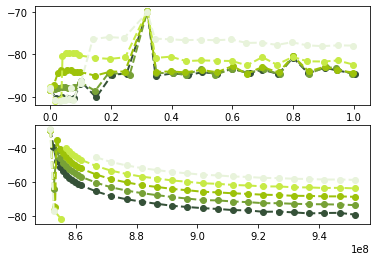

In [4]:
fig, ax = plt.subplots(2, sharey=False)
colors = ['#355138', '#77A136', '#9dc209', '#c7ea46', '#e8f3db']
for idx, g in enumerate([0,5,10,15,20]):
    ax[0].plot(results_l[idx].right_f, results_l[idx].right_p, color=colors[idx],linewidth=2, label='Gain ' + str(g), linestyle='--', marker='o')
    ax[1].plot(results_h[idx].right_f, results_h[idx].right_p, color=colors[idx],linewidth=2, label='Gain ' + str(g), linestyle='--', marker='o')
    


In [5]:
results_l[g].right_p[idx]

IndexError: list index out of range

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 3

fig, ax = plt.subplots(1, sharey=False)
colors = ['#355138', '#77A136', '#9dc209', '#c7ea46', '#e8f3db']
strengths = [-67, -62, -57, -52, -47]
gains = [0,5,10,15,20]
for idx, f in enumerate(frequencies[1:11]):
    tmp = [results_l[g].right_p[idx] for g in range(5)]
    ax.plot(strengths, tmp, linewidth=2, label='Frequency' + str(f) + 'MHz', linestyle='--', marker='o')

ax.set_ylim([-100, -70])
# ax.set_yticks(range(-550, 550, 150))
plt.grid()
ax.set_xlabel('Mixed signal strength [dBm]', fontsize=16)
ax.set_ylabel("Down-converted \nsignal strength [dBm]", fontsize=16)
ax.tick_params(labelsize=14)
plt.legend(fontsize=9, loc=1, bbox_to_anchor=(0.38, 1.02), ncol=2)
plt.tight_layout()

plt.savefig('down_conversion_1M-10M.png', bbox_inches='tight')

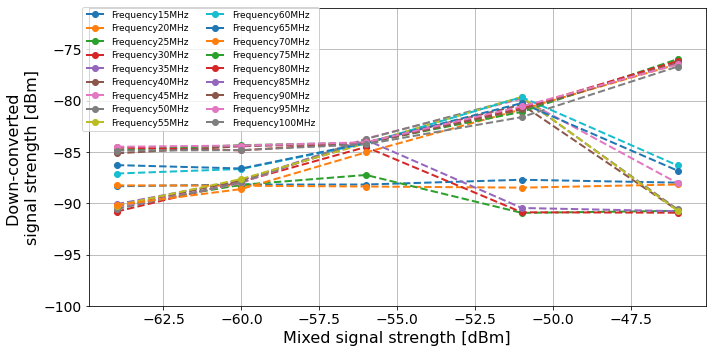

In [138]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

fig, ax = plt.subplots(1, sharey=False)
colors = ['#355138', '#77A136', '#9dc209', '#c7ea46', '#e8f3db']
strengths = [-67, -62, -57, -52, -47]
gains = [0,5,10,15,20]
for idx, f in enumerate(frequencies[11:]):
    tmp = [results_l[g].right_p[idx] for g in range(5)]
    ax.plot(strengths, tmp, linewidth=2, label='Frequency' + str(f) + 'MHz', linestyle='--', marker='o')

ax.set_ylim([-100, -71])
# ax.set_yticks(range(-550, 550, 150))
plt.grid()
ax.set_xlabel('Mixed signal strength [dBm]', fontsize=16)
ax.set_ylabel("Down-converted \nsignal strength [dBm]", fontsize=16)
ax.tick_params(labelsize=14)
plt.legend(fontsize=9, loc=1, bbox_to_anchor=(0.38, 1.02), ncol=2)
plt.tight_layout()

plt.savefig('down_conversion_15M-100M.png', bbox_inches='tight')

# debug

In [58]:
freq = 4
gain = 5

path_l = './logs/l_f' + str(freq) + '_g' + str(gain) + '/data1'
df_l = readfile(path_l + ".csv")

peakDetect_l(df_l, freq)

         frequency      power
2     5.371092e+04 -89.848305
6     6.347654e+04 -89.330391
8     6.835935e+04 -89.233940
12    7.812498e+04 -89.270523
14    8.300779e+04 -89.392151
17    9.033200e+04 -89.298546
22    1.025390e+05 -88.736427
42    1.513671e+05 -89.526642
46    1.611328e+05 -90.328270
52    1.757812e+05 -89.727463
64    2.050781e+05 -90.819031
706   1.772460e+06 -90.971642
1540  3.808593e+06 -87.397652
2322  5.717772e+06 -90.922523
4077  1.000244e+07 -86.990936
4230  1.037597e+07 -90.874069
4464  1.094726e+07 -90.452354
4750  1.164550e+07 -90.950600
4757  1.166259e+07 -90.899612
5173  1.267822e+07 -90.252197
5291  1.296630e+07 -90.773712
5445  1.334228e+07 -90.949402
5479  1.342529e+07 -90.633530
5625  1.378173e+07 -90.601555
5760  1.411132e+07 -90.830132
6333  1.551025e+07 -91.008148
6365  1.558837e+07 -90.642998
6479  1.586669e+07 -90.317291
6556  1.605468e+07 -90.936119
6765  1.656494e+07 -90.494186
7285  1.783447e+07 -90.941917
         frequency      power
1540  3.80

[3808592.6229042443, -87.39765167236328]

In [28]:
path_h = './logs/h_f' + str(freq) + '_g' + str(gain) + '/data1'
df_h = readfile(path_h + ".csv")

peakDetect_h(df_h, freq)

853700919.2350413 -35.28384780883789


[853700919.2350413,
 -35.28384780883789,
 nan,
 nan,
 852604728.1531926,
 -36.11848449707031]

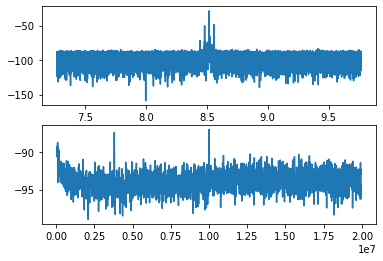

In [51]:
freq = 4
gain = 5

path_h = './logs/h_f' + str(freq) + '_g' + str(gain) + '/data1'
df_h = readfile(path_h + ".csv")
path_l = './logs/l_f' + str(freq) + '_g' + str(gain) + '/data1'
df_l = readfile(path_l + ".csv")

fig, ax = plt.subplots(2)
# ax[0].plot(df_h.frequency[50000:53000], df_h.power[50000:53000])
ax[0].plot(df_h.frequency, df_h.power)
ax[1].plot(df_l.frequency, df_l.power)

# plot

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 3
fig, ax1 = plt.subplots(1, sharey=True)
width=0.4

ax1.plot(distances, df_w_w3.mean(axis=0), color='black',linewidth=2, label='Width 3mm', linestyle='--', marker='o')
mean = df_w_w3.mean()
std = df_w_w3.std()

for i in range(1, 6):
    d=distances[i-1]
    m=mean[i-1]; s=std[i-1]/2
    ax1.vlines(d, (m-s), (m+s), color='black')
    ax1.hlines((m-s), d-width, d+width, color='black')
    ax1.hlines((m+s), d-width, d+width, color='black')
    

ax1.plot(distances, df_w_w6.mean(axis=0), color='#77A136',linewidth=2, label='Width 6mm', linestyle='--', marker='o')
mean = df_w_w6.mean()
std = df_w_w6.std()

for i in range(1, 6):
    d=distances[i-1]
    m=mean[i-1]; s=std[i-1]/2
    ax1.vlines(d, (m-s), (m+s), color='#77A136')
    ax1.hlines((m-s), d-width, d+width, color='#77A136')
    ax1.hlines((m+s), d-width, d+width, color='#77A136')
    
    
ax1.plot(distances, df_w_w8.mean(axis=0), color='#EF9136',linewidth=2, label='Width 8mm', linestyle='--', marker='o')
mean = df_w_w8.mean()
std = df_w_w8.std()

for i in range(1, 6):
    d=distances[i-1]
    m=mean[i-1]; s=std[i-1]/2
    ax1.vlines(d, (m-s), (m+s), color='#EF9136')
    ax1.hlines((m-s), d-width, d+width, color='#EF9136')
    ax1.hlines((m+s), d-width, d+width, color='#EF9136')
    
ax1.plot(distances, df_w_w10.mean(axis=0), color='#76b5c5',linewidth=2, label='Width 10mm', linestyle='--', marker='o')
mean = df_w_w10.mean()
std = df_w_w10.std()

for i in range(1, 6):
    d=distances[i-1]
    m=mean[i-1]; s=std[i-1]/2
    ax1.vlines(d, (m-s), (m+s), color='#76b5c5')
    ax1.hlines((m-s), d-width, d+width, color='#76b5c5')
    ax1.hlines((m+s), d-width, d+width, color='#76b5c5')
    
    
ax1.plot(distances, df_w_w10_air.mean(axis=0), color='red',linewidth=2, label='Width 10mm In Air', linestyle='--', marker='o')
mean = df_w_w10_air.mean()
std = df_w_w10_air.std()

for i in range(1, 6):
    d=distances[i-1]
    m=mean[i-1]; s=std[i-1]/2
    ax1.vlines(d, (m-s), (m+s), color='red')
    ax1.hlines((m-s), d-width, d+width, color='red')
    ax1.hlines((m+s), d-width, d+width, color='red')
    
# ax1.set_ylim([-600, 600])
# ax1.set_yticks(range(-550, 550, 150))
plt.grid()
ax1.set_xlabel('Distance [cm]', fontsize=20)
ax1.set_ylabel("$f$ [MHz]", fontsize=20)
ax1.tick_params(labelsize=14)
plt.legend(fontsize=14, loc=1, bbox_to_anchor=(0.8, 0.36), ncol=2)
plt.tight_layout()
#plt.title('Box Size ')

# plt.savefig('finger_contact_10-100.png', bbox_inches='tight')

In [ ]:
distances = [5,10,15,20,25,30,40,50,60,70,80,90,100]
df_w_w10_air = readDistance('w_w10_air/', distances, [0], 15)
df_w_w10_air = df_w_w10_air/1e6

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 3
fig, ax1 = plt.subplots(1, sharey=True)
width=0.4
    
ax1.plot(distances, df_w_w10.mean(axis=0), color='#76b5c5',linewidth=2, label='Width 10mm Touch', linestyle='--', marker='o')
mean = df_w_w10.mean()
std = df_w_w10.std()

for i in range(1, 6):
    d=distances[i-1]
    m=mean[i-1]; s=std[i-1]/2
    ax1.vlines(d, (m-s), (m+s), color='#76b5c5')
    ax1.hlines((m-s), d-width, d+width, color='#76b5c5')
    ax1.hlines((m+s), d-width, d+width, color='#76b5c5')
    
    
ax1.plot(distances, df_w_w10_air.mean(axis=0), color='red',linewidth=2, label='Width 10mm In Air', linestyle='--', marker='o')
mean = df_w_w10_air.mean()
std = df_w_w10_air.std()

for i in range(1, 6):
    d=distances[i-1]
    m=mean[i-1]; s=std[i-1]/2
    ax1.vlines(d, (m-s), (m+s), color='red')
    ax1.hlines((m-s), d-width, d+width, color='red')
    ax1.hlines((m+s), d-width, d+width, color='red')
    
ax1.set_ylim([612.5, 616.5])
# ax1.set_yticks(range(-550, 550, 150))
plt.grid()
ax1.set_xlabel('Distance [cm]', fontsize=20)
ax1.set_ylabel("$f$ [MHz]", fontsize=20)
ax1.tick_params(labelsize=14)
plt.legend(fontsize=14, loc=1, bbox_to_anchor=(0.8, 0.36), ncol=2)
plt.tight_layout()
#plt.title('Box Size ')

plt.savefig('finger_contactvsnoncontact.png', bbox_inches='tight')